In [1]:
import numpy as np
np.random.seed(11)

Selen Çiğdem<br>
Didem Kahyaoğlu

# First Dataset

In [2]:
n=150 #number of data
feature=2 #number of features of each data

#linear equation is defined 
#parameters array holds coefficients of equation (such as slope of line ) (we did not add any constant value on purpose)
def linear(x,parameters):
  y=parameters[0]*x
  return y


In [3]:
#calculates label
def find_label(X,noise,equation,parameteres):
  x2=equation(X[0],parameters)
  y=np.where(X[1]+noise>=x2,1,-1) #it decides if point is below of the function or above it

  return y

In [4]:
X=np.random.uniform(-1,1,size=(2,n)) # synthetic dataset
noise=np.random.uniform(-0.15,0.15,size=X[0].shape) #since we don't want decision boundary to seperate classes perfectly with 0 error,we added some noise
parameters=np.array([0.5])
y=find_label(X,noise,linear,parameters)



**Visualisation Of Dataset**

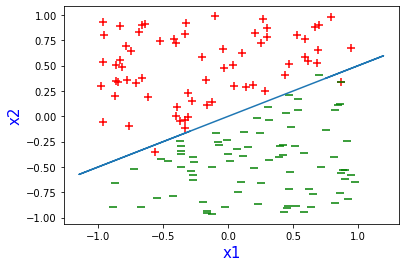

In [5]:
import matplotlib.pyplot as plt
color = ['green' if x<1 else 'red' for x in y[:]]
mark=['_' if x<1 else '+' for x in y[:]]

temp_X1=np.random.uniform(-1.2,1.2,n)
temp_X2=linear(temp_X1,parameters)
plt.show()
for i in range(len(mark)):
  plt.scatter(X[0][i],X[1][i],c=color[i],marker=mark[i],s=80)
plt.xlabel("x1",fontsize=15,color="b")
plt.ylabel("x2",fontsize=15,color="b")
plt.plot(temp_X1,temp_X2)



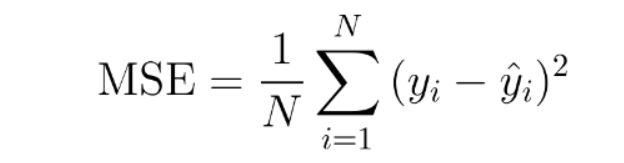

In [6]:
#below function calculates mean square error
def mean_square_error(y_pred,y):
  mse= np.sum(np.square(y_pred-y))
  mse=(mse/len(y))
  return mse

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test= train_test_split(X.T,y,test_size=0.3,random_state=4  )
x_test.shape

(45, 2)

In [8]:
#calculates accuracy for test and training data separately for each k value in k array.
#finds k value that gives maximum accuracy
from sklearn import metrics
def calculate_accuracy(x_train,x_test,y_train,y_test,k,noise):
  test_accuracy=[]
  train_accuracy=[]

  best_k_test=0
  max_accuracy_test = 0


  x_test=x_test+noise
  
  for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)

    y_training_pred=knn.predict(x_train)
    train_score = metrics.accuracy_score(y_train, y_training_pred)
    train_accuracy.append(train_score)
 

    y_test_pred=knn.predict(x_test)
    test_score = metrics.accuracy_score(y_test, y_test_pred)
    test_accuracy.append(test_score)
  

    if test_score > max_accuracy_test:
        max_accuracy_test = test_score;
        best_k_test = i;
    
  
  return train_accuracy,test_accuracy,best_k_test

In [9]:
#plots accuracy graph
def plot_accuracy(k,train_accuracy,test_accuracy):
  plt.show()
  plt.plot(k,train_accuracy,color="yellow")
  plt.plot(k,test_accuracy,color="orange")
  plt.xlabel('Value of K for KNN')
  plt.ylabel('Accuracy')
  plt.legend(["Train Accuracy", "Test Accuracy"], loc ="upper right")


In [10]:
def show_error_accuracy_for_best_k(x_train,x_test,y_train,y_test,k):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_test,y_test)
  y_predict_train=knn.predict(x_train)
  train_error=mean_square_error(y_predict_train,y_train)
  print("train error for minimum k is: ",train_error)

  train_accuracy=metrics.accuracy_score(y_train, y_predict_train)
  print("train accuracy for minimum k is: ",train_accuracy)
  

  y_predict_test=knn.predict(x_test)
  test_error=mean_square_error(y_predict_test,y_test)
  print("test error for minimum k is: ",test_error)

  test_accuracy=metrics.accuracy_score(y_test, y_predict_test)
  print("test accuracy for minimum k is: ",test_accuracy)


In [11]:
k=list(range(1,25))
noise=np.random.uniform(-1.9,2.8,x_test.shape) #extra noise for test data, we used that as a test case to see how noise affects accuracy
#noise=0
train_accuracy,test_accuracy,best_k=calculate_accuracy(x_train,x_test,y_train,y_test,k,noise)
print("best k value for first dataset is",best_k)
show_error_accuracy_for_best_k(x_train,x_test,y_train,y_test,best_k)

best k value for first dataset is 18
train error for minimum k is:  0.3047619047619048
train accuracy for minimum k is:  0.9238095238095239
test error for minimum k is:  0.4444444444444444
test accuracy for minimum k is:  0.8888888888888888


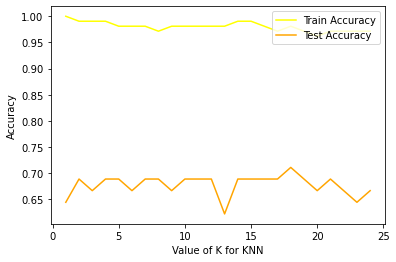

In [12]:
plot_accuracy(k,train_accuracy,test_accuracy)

We added an extra noise to observe how the best k value is affected by noisy test data. We concluded that if we increase noise, k value which gives maximum accuracy will decreases. Since we need flexibility to capture generelization of noisy data set. Small k means more flexibility and higher variance. We need wiggly graph to represent noisy dataset.

When we didn't add any noise to original test data, we get maximum accuracy with higher k value compared to noisy data set. That means, we have a smooth data originally. We can sepreate this data easly using model that have less complexity provided by less parameters.


# Second Dataset

In [13]:
def curve(x1, parameters):
  x2=x1*x1*parameters[0]+parameters[1]*x1
  return x2

In [14]:
noise=np.random.uniform(-0.1,0.1,size=X[0].shape) #we added noise since we don't wnat to get 1.0 accuracy as classifying data
parameters=np.array([-1,0.2])
y=find_label(X,noise,curve,parameters)
y.shape


(150,)

In [15]:
x_train,x_test,y_train,y_test= train_test_split(X.T,y,test_size=0.3,random_state=4  )
x_test.shape

(45, 2)

**Visualization of Dataset**

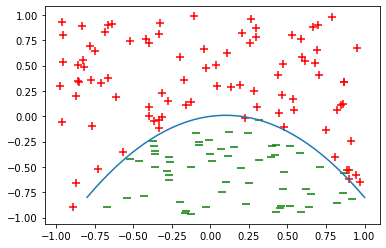

In [16]:
import matplotlib.pyplot as plt
color = ['green' if x<1 else 'red' for x in y[:]]
mark=['_' if x<1 else '+' for x in y[:]]


temp_X1=np.linspace(-0.8,1,40)
temp_X2=curve(temp_X1,parameters)
plt.show()
plt.plot(temp_X1,temp_X2)
for i in range(len(mark)):
  plt.scatter(X[0][i],X[1][i],c=color[i],marker=mark[i],s=80)

In [17]:
parameters=np.array([-1,0.2]) #original parameters
#parameters=np.array([-1.5,0.1]) #changes in parameters of curve equation

noise=np.random.uniform(-0.2,0.2,len(x_test))
y_test=find_label(x_test.T,noise,curve,parameters) #we assigned new labels for x_test by changing curve equation's parameters to create test case
y_test.shape                                       #so that we can observe how the difference between test data and training data affects accuracy


(45,)

In [18]:
noise=0
train_accuracy,test_accuracy,best_k=calculate_accuracy(x_train,x_test,y_train,y_test,k,noise)

print("best k value for second dataset is",best_k)
show_error_accuracy_for_best_k(x_train,x_test,y_train,y_test,best_k)

best k value for second dataset is 4
train error for minimum k is:  0.8380952380952381
train accuracy for minimum k is:  0.7904761904761904
test error for minimum k is:  0.35555555555555557
test accuracy for minimum k is:  0.9111111111111111


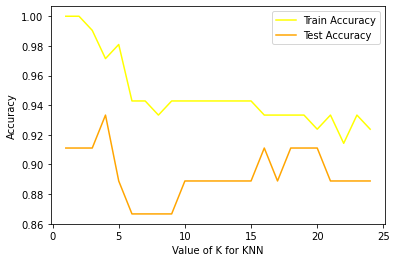

In [19]:
plot_accuracy(k,train_accuracy,test_accuracy)

Second data gives maximum accuracy with less k value with compared to first dataset which is linear. Now, real decision boundary of second synthetic data is a curve shaped, model for second data set is more flexible than first data set. Thus we need more flexibility provided by lower k value to represent second dataset. When we added high value for extra noise, we observed that model was not able to predict true labels successfully.

In the second experiment, instead of adding random noise directly to the test data, we changed the coefficients of the equation in which we created the training dataset while generating the test data. Test accuracy decreases since now we increased the difference between training and test data by changing equation coefficients.

# Third Dataset

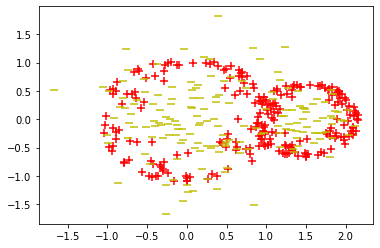

In [20]:
R = 2
num_points = 120

np.random.seed(1)
theta = np.random.uniform(0,2*np.pi, num_points)
radius = np.random.uniform(0,R, num_points) **0.15

x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)

first_class=np.c_[np.r_[x1,x1*0.6+1.5],np.r_[y1,y1*0.6]] #plus marker
first_class=first_class.T 

second_class=np.c_[np.random.normal(0,0.6,(2,num_points)),np.random.normal(1.5,0.3,(2,50))+np.array([[0,-1.5]]).T] #minus marker

plt.scatter(first_class[0],first_class[1], s=50,marker="+",color="r")
plt.scatter(second_class[0],second_class[1],marker="_",s=50,color="y")


In [21]:
X=np.c_[first_class,second_class]
X.shape


(2, 410)

In [22]:
y=np.r_[np.ones_like(first_class[0]),np.ones_like(second_class[0])*-1] #creates labels associated with classes; +1 for first class, -1 for second class.
y.shape

(410,)

In [23]:
x_train,x_test,y_train,y_test= train_test_split(X.T,y,test_size=0.3,random_state=4  )

In [24]:
noise=0
k=np.array(range(1,20))
train_accuracy,test_accuracy,best_k=calculate_accuracy(x_train,x_test,y_train,y_test,k,noise)
print("best k value for first dataset is",best_k)
show_error_accuracy_for_best_k(x_train, x_test, y_train, y_test, best_k)

best k value for first dataset is 1
train error for minimum k is:  1.3101045296167246
train accuracy for minimum k is:  0.6724738675958188
test error for minimum k is:  0.0
test accuracy for minimum k is:  1.0


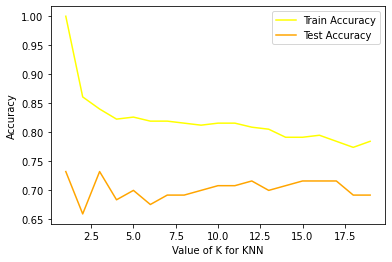

In [25]:
plot_accuracy(k,train_accuracy,test_accuracy)

Compared to other datasets, the last dataset has a much smaller best k-value. We can attribute this to the fact that the functions used to generate the final data are more complex than the others. Since the graph does not have a smooth structure, we increase its flexibility by decreasing the k value. In addition, the minimum error value was higher than other data sets. The reason for this is that the data does not have an easily separatable distribution. Compared to other datasets, its mathematical structure is the most complex and the most difficult to group.

Besides, differently, last accuracy graph doesn't have stable regions meaning that slight changes in k value has an important effect on the success of model.

Also we observed that number of data has a huge impact on accuracy and error.

(Last value of k was 1 for above dataset. It means that it overfits training data and gives 1.0 accuracy and 0 error for training data while could't be successfull in the test data)